In [1]:
import pandas as pd
import re
import numpy as np
import math
from math import log, log10

In [2]:
#!pip install plotly

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#!unzip "USM00072403-data.txt.zip"

In [5]:
station_codes = {'SPOKANE': 'USM00072786', 'QUILLAYUTE': 'USM00072797', 'MIRAMAR': 'USM00072293',
                'EDWARDS AFB': 'USM00072381', 'OAKLAND':'USM00072493', 'STERLING':'USM00072403'}

In [6]:
def record_reading(lines):
    records = []
    for line in lines:
        if line[0]=="#":
            s = line.split(" ")
            y,d,m,h = s[1], s[2], s[3], s[4]
        else:
            if y in ['2022', '2023']:
                date = " ".join([y,d,m])
                hour = h
                data = [0]*13
                line = re.sub(' +',' ',line)
                #print(line)
                r = line.split(" ")
                #print(r)
                if len(r) <= 8:
                    continue
                #break
                data[0], data[1] = r[0][0], r[0][1]
                data[2] = r[1]
                data[3], data[4] = (r[2][:-1], r[2][-1])  if r[2] and r[2][-1] in ['A', 'B'] else (r[2], np.nan)
                data[5], data[6] = (r[3][:-1], r[3][-1])  if r[3] and r[3][-1] in ['A', 'B'] else (r[3], np.nan)
                data[7], data[8] = (r[4][:-1], r[4][-1])  if r[4] and r[4][-1] in ['A', 'B'] else (r[4], np.nan)
                data[9] = r[5] if r[5] else np.nan
                data[10] = r[6] if r[6] else np.nan
                data[11] = r[7] if r[7] else np.nan
                data[12] = r[8] if r[8] else np.nan
                l = []
                l.append(date)
                l.append(hour)
                l.extend(data)
                records.append(l)
    return records


In [7]:
def data_loading(station_name):
    file = open(station_codes[station_name]+"-data.txt", 'r')
    lines = file.readlines()
    records = record_reading(lines)
    header = ['Date', 'Hour','LVLTYP1', 'LVLTYP2', 'ETIME', 'PRESS', 'PFLAG', 'GPH', 'ZFLAG', 'TEMP', 'TFLAG', 'RH', 'DPDP', 'WDIR', 'WSPD']
    df = pd.DataFrame(records , columns= header)
    return df

In [8]:
def preprocess():
    df.replace('-9999', np.nan, inplace=True)
    df.replace('-8888', np.nan, inplace=True)
    pattern = r'[^-0-9]'
    df['TEMP'] = df['TEMP'].replace({pattern: np.nan}, regex=True)
    df['TEMP'].replace('', np.nan, inplace=True)
    df['TEMP'] = pd.to_numeric(df['TEMP'], errors='coerce')
    pattern = r'[^-0-9]'
    df['PRESS'] = df['PRESS'].replace({pattern: np.nan}, regex=True)
    df['PRESS'].replace('', np.nan, inplace=True)
    df['PRESS'] = pd.to_numeric(df['PRESS'], errors='coerce')
    
    df['GPH'] = df['GPH'].replace({pattern: np.nan}, regex=True)
    df['GPH'].replace('', np.nan, inplace=True)
    df['GPH'] = pd.to_numeric(df['GPH'], errors='coerce')
    
    df['DPDP'] = df['DPDP'].replace({pattern: np.nan}, regex=True)
    df['DPDP'].replace('', np.nan, inplace=True)
    df['DPDP'] = pd.to_numeric(df['DPDP'], errors='coerce')
    
    df['WDIR'] = df['WDIR'].replace({pattern: np.nan}, regex=True)
    df['WDIR'].replace('', np.nan, inplace=True)
    df['WDIR'] = pd.to_numeric(df['WDIR'], errors='coerce')
    
    df['WSPD'] = df['WSPD'].replace({pattern: np.nan}, regex=True)
    df['WSPD'].replace('', np.nan, inplace=True)
    df['WSPD'] = pd.to_numeric(df['WSPD'], errors='coerce')
    
        

In [9]:
def convert_RH(RH_water, T):
#     e_w = 6.112 * math.exp((17.67 * T) / (T + 243.5))
#     e_i = 6.112 * math.exp((22.46 * T) / (T + 272))
#     RH_ice = (e_w/e_i)*RH_water
    
#     return RH_ice
        est = 1013.25 #hpa
        eio = 6.1173 #hpa
        e_w = -7.90298*((372.15/T)-1) + (5.02808)*log10((372.15/T)) - (1.3816* math.pow(10, -7))*(math.pow(10, 11.344*(1-(T/372.15)))-1) \
        + (8.1328 * math.pow(10, -3))*(math.pow(10, -3.49149*((372.15/T)-1)-1)) + log10(est)

        ew = math.pow(10,e_w)
        e_i = -9.09718*((273.16/T)-1) - (3.56654 * log10(273.16/T)) + 0.876793*(1-(T/273.16)) + log10(eio)
        ei = math.pow(10,e_i)
        
        return (ew/ei)*RH_water
    

In [10]:
def process_convention():
    df['RH'] = df['RH'].astype(float)/10.0
    df['TEMP'] = df['TEMP'].astype(float)/10.0
    df['GPH'] = df['GPH'].fillna(0)
    df['GPH'] = df['GPH'].astype(int)
    df['DPDP'] = df['DPDP'].fillna(0.0)
    df['DPDP'] = df['DPDP'].astype(float)/10.0
    df['WDIR'] = df['WDIR'].fillna(0.0)
    df['WDIR'] = df['WDIR'].astype(float)/10.0
    df['WSPD'] = df['WSPD'].fillna(0.0)
    df['WSPD'] = df['WSPD'].astype(float)/10.0
    

In [11]:
station_name = 'SPOKANE'

In [12]:
df = data_loading(station_name)
df.head()

,Date,Hour,LVLTYP1,LVLTYP2,ETIME,PRESS,PFLAG,GPH,ZFLAG,TEMP,TFLAG,RH,DPDP,WDIR,WSPD
0,2022 01 01,00,2,1,0,92964,B,729,NaN,-118,B,740,37,245,21
1,2022 01 01,00,1,0,8,92500,NaN,767,B,-118,B,734,38,238,20
2,2022 01 01,00,2,0,100,89267,NaN,1040,B,-122,B,694,44,20,10
3,2022 01 01,00,1,0,212,85000,NaN,1411,B,-158,B,889,14,34,19
4,2022 01 01,00,2,0,234,83649,NaN,1532,B,-170,B,940,7,28,28


In [13]:
preprocess()
process_convention()

In [14]:
df.head()

,Date,Hour,LVLTYP1,LVLTYP2,ETIME,PRESS,PFLAG,GPH,ZFLAG,TEMP,TFLAG,RH,DPDP,WDIR,WSPD
0,2022 01 01,00,2,1,0,92964.0,B,729,NaN,-11.8,B,74.0,3.7,24.5,2.1
1,2022 01 01,00,1,0,8,92500.0,NaN,767,B,-11.8,B,73.4,3.8,23.8,2.0
2,2022 01 01,00,2,0,100,89267.0,NaN,1040,B,-12.2,B,69.4,4.4,2.0,1.0
3,2022 01 01,00,1,0,212,85000.0,NaN,1411,B,-15.8,B,88.9,1.4,3.4,1.9
4,2022 01 01,00,2,0,234,83649.0,NaN,1532,B,-17.0,B,94.0,0.7,2.8,2.8


In [15]:
# g = sns.relplot(
#     data=df,
#     x="Month", y="TEMP", col="Year", hue="Year",
#     kind="line", palette="crest", linewidth=4, zorder=5,
#     col_wrap=3, height=2, aspect=1.5, legend=False,
# )

# # Iterate over each subplot to customize further
# for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
#     ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

#     # Plot every year's time series in the background
#     sns.lineplot(
#         data=df, x="Month", y="TEMP", units="Year",
#         estimator=None, color=".7", linewidth=1, ax=ax,
#     )

# # Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# # Tweak the supporting aspects of the plot
# g.set_titles("")
# g.set_axis_labels("", "Passengers")
# g.tight_layout()

In [16]:
# import plotly.graph_objects as go
# import pandas as pd

# # Example data
# # data = {'Time': [1, 2, 3, 4, 5],
# #         'Altitude': [100, 200, 300, 400, 500],
# #         'Temperature': [20, 25, 30, 35, 40]}

# # df = pd.DataFrame(data)

# # Create a 3D scatter plot
# fig = go.Figure(data=[go.Scatter3d(
#     x=df['Date'],
#     y=df['TEMP'],
#     z=df['GPH'],
#     mode='markers',
#     marker=dict(size=8, color=df['TEMP'], colorscale='Viridis', opacity=0.8)
# )])

# # Set labels and title
# fig.update_layout(scene=dict(
#                     xaxis_title='Time',
#                     yaxis_title='Temperature',
#                     zaxis_title='Altitude'),
#                   title='3D Plot of Time, Altitude, and Temperature')

# fig.show()

In [17]:
df['TEMP_K'] = df['TEMP'] + 273.15

In [18]:
df['PRESS'] = df['PRESS'].astype(float)/100

In [19]:
#Pressure altitude
def calculate_pressure_altitude(press):
    press_alt_feet = (1-math.pow((press/1013.25), 0.190284))*145366.45
    #press_alt_mts = 0.3048 * press_alt_feet
    return press_alt_feet

In [20]:
df['PRESS_ALT'] = df['PRESS'].apply(calculate_pressure_altitude)

In [21]:
df['RH_ice'] = df.apply(lambda row: convert_RH(row['RH'], row['TEMP_K']), axis=1)

In [22]:
df['GPH_ft'] = df['GPH'] * 3.28084

In [23]:
df.head()

,Date,Hour,LVLTYP1,LVLTYP2,ETIME,PRESS,PFLAG,GPH,ZFLAG,TEMP,TFLAG,RH,DPDP,WDIR,WSPD,TEMP_K,PRESS_ALT,RH_ice,GPH_ft
0,2022 01 01,00,2,1,0,929.64,B,729,NaN,-11.8,B,74.0,3.7,24.5,2.1,261.35,2362.768359,89.335307,2391.73236
1,2022 01 01,00,1,0,8,925.00,NaN,767,B,-11.8,B,73.4,3.8,23.8,2.0,261.35,2498.860178,88.610966,2516.40428
2,2022 01 01,00,2,0,100,892.67,NaN,1040,B,-12.2,B,69.4,4.4,2.0,1.0,260.95,3462.763030,84.119974,3412.07360
3,2022 01 01,00,1,0,212,850.00,NaN,1411,B,-15.8,B,88.9,1.4,3.4,1.9,257.35,4779.193602,111.734330,4629.26524
4,2022 01 01,00,2,0,234,836.49,NaN,1532,B,-17.0,B,94.0,0.7,2.8,2.8,256.15,5207.147756,119.581491,5026.24688


In [24]:
#df.to_csv(station_codes[station_name]+'_converted_data.csv')

In [25]:

df['Year']= df['Date'].str.split(' ').str[0]
df['Month'] = df['Date'].str.split(' ').str[1]
df['Day'] = df['Date'].str.split(' ').str[2]
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.to_csv(station_name+'_converted_data.csv')

In [26]:
#df[(df['PRESS'] >= 236) & (df['RH_ice']/100  >= 100)]['Date'].nunique()

In [27]:
df[(df['GPH_ft']>= 30000) & (df['GPH_ft'] < 43000)].describe()

,PRESS,GPH,TEMP,RH,DPDP,WDIR,WSPD,TEMP_K,PRESS_ALT,RH_ice,GPH_ft
count,18343.00000,24697.000000,18220.000000,18233.000000,24697.000000,24697.000000,24697.000000,18220.000000,18343.000000,18220.000000,24697.000000
mean,225.25193,11200.091752,-52.706855,27.701344,9.597611,25.138580,24.540337,220.443145,11106.667817,50.448781,36745.709024
std,40.40250,1111.575483,6.760092,19.918719,9.181777,7.427071,13.858448,6.760092,1125.560979,36.556273,3646.901308
min,152.34000,9144.000000,-73.200000,0.900000,0.000000,0.000000,0.000000,199.950000,8667.584142,1.490853,30000.000960
25%,193.12500,10302.000000,-57.300000,10.500000,0.000000,22.600000,14.400000,215.850000,10309.720721,18.675239,33799.213680
50%,218.52000,11260.000000,-52.800000,24.600000,7.500000,26.200000,22.500000,220.350000,11216.905950,44.710171,36942.258400
75%,251.89500,12142.000000,-48.500000,43.400000,14.300000,30.000000,33.000000,224.650000,11985.721199,80.085750,39835.959280
max,322.76000,13106.000000,-28.600000,100.000000,36.500000,46.800000,78.000000,244.550000,13412.285781,202.347170,42998.689040


In [28]:
df[(df['GPH_ft']>= 30000) & (df['GPH_ft'] < 43000) & (df['TEMP']<= -40) & (df['RH_ice'] >= 100)]

,Date,Hour,LVLTYP1,LVLTYP2,ETIME,PRESS,PFLAG,GPH,ZFLAG,TEMP,...,DPDP,WDIR,WSPD,TEMP_K,PRESS_ALT,RH_ice,GPH_ft,Year,Month,Day
573,2022-01-02,12,2,0,2525,288.88,NaN,9269,B,-50.9,...,4.5,26.0,50.7,222.25,9411.783688,105.113027,30410.10596,2022,01,02
1662,2022-01-05,12,2,0,2640,274.97,NaN,9492,B,-53.6,...,3.8,31.3,76.2,219.55,9737.936381,115.728558,31141.73328,2022,01,05
1663,2022-01-05,12,2,2,2719,263.97,NaN,9753,B,-55.5,...,4.2,31.0,71.7,217.65,10005.455817,110.109543,31998.03252,2022,01,05
1839,2022-01-06,00,2,0,2849,251.69,NaN,10216,B,-56.1,...,3.0,31.3,70.8,217.05,10314.987349,127.990276,33517.06144,2022,01,06
1840,2022-01-06,00,1,0,2858,250.00,NaN,10259,B,-56.4,...,3.2,31.3,71.0,216.75,10358.537791,126.273221,33658.13756,2022,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226297,2023-12-31,00,2,0,3205,267.66,NaN,9880,B,-56.6,...,3.1,17.5,29.0,216.55,9914.725524,123.503063,32414.69920,2023,12,31
226298,2023-12-31,00,2,0,3247,260.78,NaN,10044,B,-57.4,...,2.9,18.0,27.7,215.75,10084.723476,126.803567,32952.75696,2023,12,31
226299,2023-12-31,00,2,2,3258,258.99,NaN,10088,B,-57.5,...,3.1,18.2,27.2,215.65,10129.547304,123.522931,33097.11392,2023,12,31
226300,2023-12-31,00,1,0,3400,250.00,NaN,10311,B,-56.8,...,4.4,18.6,22.0,216.35,10358.537791,104.251720,33828.74124,2023,12,31


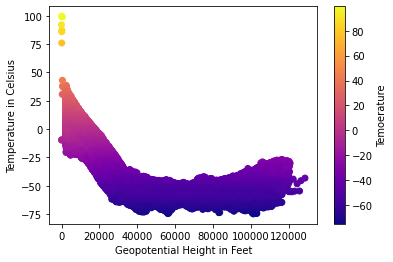

In [29]:
#df.plot(x='GPH_ft', y='TEMP', kind='scatter')
plt.scatter(df['GPH_ft'], df['TEMP'], c=df['TEMP'], cmap='plasma')
plt.colorbar(label='Temoerature')
plt.xlabel('Geopotential Height in Feet')
plt.ylabel('Temperature in Celsius')
plt.show()

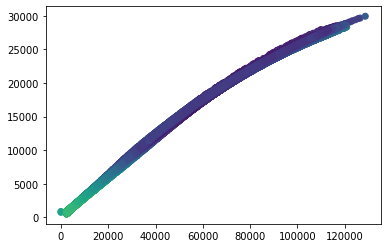

In [30]:
#df.plot(x='GPH_ft', y='PRESS_ALT', kind='scatter')
plt.scatter(df['GPH_ft'], df['PRESS_ALT'], c=df['TEMP'], cmap='viridis')
plt.show()

<AxesSubplot:xlabel='GPH_ft', ylabel='RH'>

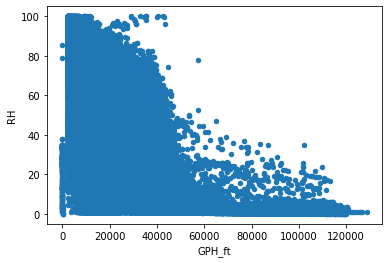

In [44]:
df.plot(x='GPH_ft', y='RH', kind='scatter')

<AxesSubplot:xlabel='GPH_ft', ylabel='RH_ice'>

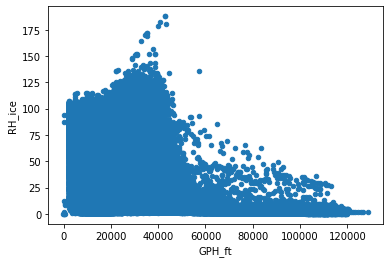

In [45]:
df.plot(x='GPH_ft', y='RH_ice', kind='scatter')

In [53]:
bins = pd.cut(df['GPH_ft'], bins=range(0, int(df['GPH_ft'].max()) + 10000, 10000), right=False)


In [55]:
result = df.groupby(bins)['TEMP'].mean().reset_index()

In [56]:
result

,GPH_ft,TEMP
0,"[0, 10000)",4.629709
1,"[10000, 20000)",-11.359591
2,"[20000, 30000)",-33.447929
3,"[30000, 40000)",-52.219522
4,"[40000, 50000)",-55.327612
5,"[50000, 60000)",-56.962163
6,"[60000, 70000)",-56.922622
7,"[70000, 80000)",-55.536110
8,"[80000, 90000)",-53.449083
9,"[90000, 100000)",-50.466814


<AxesSubplot:xlabel='GPH_ft'>

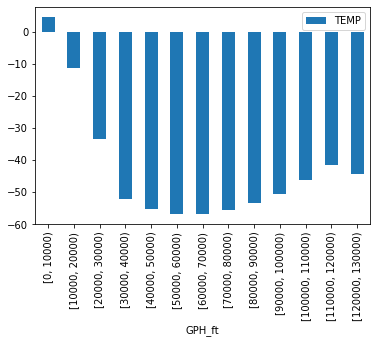

In [58]:
result.plot(x='GPH_ft', y='TEMP', kind='bar')

In [31]:
issr_df = df[(df['TEMP']<= -40) & (df['RH_ice'] >= 100)]

### Queries

In [32]:
df[df['RH_ice']>=100].GPH_ft.describe()

count     8116.000000
mean     22913.526024
std      11259.743556
min          0.000000
25%      14001.804910
50%      23894.357720
75%      32369.587650
max      57208.007080
Name: GPH_ft, dtype: float64

In [73]:
sample = df[(df['Date']== '2023-01-05')]
sample = sample[(sample['GPH_ft']< 43000)& (sample['RH_ice'] >= 100 )]

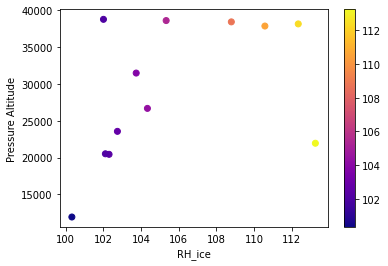

In [74]:
plt.scatter(sample['RH_ice'], sample['PRESS_ALT'], c=sample['RH_ice'], cmap='plasma')
plt.colorbar(label='')
plt.xlabel('RH_ice')
plt.ylabel('Pressure Altitude')
plt.show()

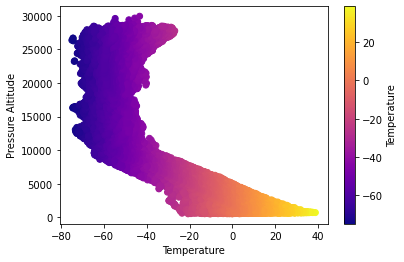

In [33]:
plt.scatter(df['TEMP'], df['PRESS_ALT'], c=df['TEMP'], cmap='plasma')
plt.colorbar(label='Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure Altitude')
plt.show()

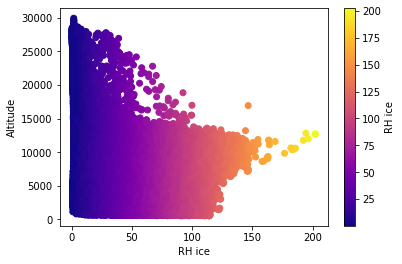

In [34]:
plt.scatter(df['RH_ice'], df['PRESS_ALT'],  c=df['RH_ice'], cmap='plasma')
plt.colorbar(label='RH ice')
plt.xlabel('RH ice')
plt.ylabel('Altitude')
plt.show()

In [ ]:
# plt.scatter(df['RH_ice'], df['PRESS_ALT'],  c=df['RH_ice'], cmap='plasma')
# plt.colorbar(label='RH ice')
# plt.xlabel('RH ice')
# plt.ylabel('Altitude')
# plt.show()

## ISSR days
#ISS conditions were present in the region X% days,

#Time of Day

#ISSR days @ midnight

#ISSR days @ noon


In [51]:
df['Date'].nunique()

730

In [32]:
issr_df['Date'].nunique()

406

In [33]:
(issr_df['Date'].nunique()/df['Date'].nunique())*100

55.61643835616439

In [34]:
issr_df[issr_df['Hour']=='00']['Date'].nunique()

163

In [52]:
163/730

0.2232876712328767

In [35]:
issr_df[issr_df['Hour']=='12']['Date'].nunique()

333

In [53]:
333/730

0.45616438356164385

In [48]:
#Month

#ISSR days in Jan
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
obs = []
for i in range(1,13):
    obs.append(issr_df[(issr_df['Year']=='2023') & (issr_df['Month'].astype(int) == i)]['Date'].nunique())
    print(i ," " , obs[-1])


1   18
2   23
3   24
4   25
5   20
6   19
7   5
8   14
9   21
10   18
11   23
12   26


Text(0, 0.5, 'No of days of ISSR occurances in 2023')

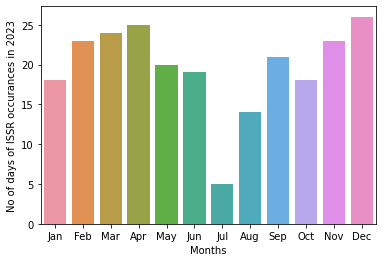

In [49]:
sns.barplot(x= months, y= obs)
plt.xlabel('Months')
plt.ylabel('No of days of ISSR occurances in 2023')

In [30]:
#Contrail Vertical Depth (i.e. Ceiling-Floor) - what is depth 
# by day

#also show with a histogram (x-axis = depth of ISSR, y-axis = count of days with ISSR)

#Note: We want to be able to understand how the ISSR vertical depth fluctuates over time. Is it random or does it follow a pattern?

In [35]:
issr_df['Date'].value_counts()

2024-01-19    37
2024-01-31    34
2023-05-28    32
2023-10-22    30
2023-12-05    29
              ..
2022-08-30     1
2023-08-14     1
2023-08-13     1
2023-07-25     1
2022-01-02     1
Name: Date, Length: 355, dtype: int64

In [46]:
vd = issr_df[(issr_df['Date']== '2023-01-19') & (issr_df['Hour']=='00')]['GPH_ft']
print(vd.max()-vd.min())
vd = issr_df[(issr_df['Date']== '2023-01-19') & (issr_df['Hour']=='12')]['GPH_ft']
print(vd.max()-vd.min())

9888.451760000004
9032.152520000003


In [42]:
max_depth = df.groupby(['Date', 'Hour']).agg({'GPH_ft': 'max'}).reset_index()
min_depth = df.groupby(['Date', 'Hour']).agg({'GPH_ft': 'min'}).reset_index()

In [43]:
depth = max_depth
depth['min'] = min_depth['min']
depth

KeyError: 'min'

In [31]:
#Contrail Depth by Altitude - what altitude range includes a contrail

# by day (x-axis = day of year, y-axis = altitude. Show floor and ceiling

# also show with a histogram (x-axis = Altitude from FL300 to FL430, y-axis = count of days with ISSR)

# Note: We want oto be able to understand how the floor and ceiling fluctuate over time. Is it random or does it follow a pattern?